# Read SUMMA output

In [1]:
# netcdf/numpy/xray/stats
import numpy as np
from datetime import datetime, timedelta
import pandas as pd
import xarray as xr
from scipy.stats.stats import pearsonr

# OS interaction
import sys, pickle, os

# import plotting
import seaborn as sns
import matplotlib
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.basemap import Basemap
import kgraph

# Offline Turbulence Package
import turbpy

# Customize
sns.set_style("whitegrid")
sns.set_context('paper')
%matplotlib inline

In [2]:
# --------------------------------------------------------------------------------------------------------------------
# Directory Lists
# Unix
if 'linux' in sys.platform:
    dirPre = '/home/lapok/gdrive/'
# Mac
elif 'darwin' in sys.platform:
    dirPre = '/Users/karllapo/gdrive/'

dirProj = dirPre + 'SnowHydrology/proj/ModTsfc/'
dirPrint = dirProj + 'Graphics'
dirData = dirProj + 'data'



## Evaluation data

In [15]:
os.chdir(dirData)
SWA = xr.open_dataset('SWA.ModTsfc.nc')
SNQ = xr.open_dataset('SNQ.ModTsfc.nc')
CDP = xr.open_dataset('CDP.ModTsfc.nc')

# --------------------------------------------------------------------------------------------
# Select only the model forcing period
CDP = CDP.loc[dict(time = slice(datetime(2005, 10, 1), datetime(2006, 9, 1)))]

# --------------------------------------------------------------------------------------------
# Add bulk stability measure to each site
RiBulk,_,_ = turbpy.bulkRichardson(SWA.Tair + 273.15, SWA.Tsrf + 273.15, SWA.WIND, 6 - SWA.snowDepth)
SWA['RiBulk'] = RiBulk
RiBulk,_,_ = turbpy.bulkRichardson(SNQ.Tair + 273.15, SNQ.Tsrf + 273.15, SNQ.WIND, 6 - SNQ.snowDepth)
SNQ['RiBulk'] = RiBulk
RiBulk,_,_ = turbpy.bulkRichardson(CDP.Tair + 273.15, CDP.Tsrf + 273.15, CDP.WIND, 6 - CDP.snowDepth)
CDP['RiBulk'] = RiBulk

# --------------------------------------------------------------------------------------------
# Resample to daily
dailyResample = False
if dailyResample:
    # Other accounting
    SWA_daily = SWA.resample(how='mean', freq='d', dim='time')
    SNQ_daily = SNQ.resample(how='mean', freq='d', dim='time')
    CDP_daily = CDP.resample(how='mean', freq='d', dim='time')

    os.chdir(dirData)
    SWA_daily.to_netcdf('SWA.ModTsfc.Daily.nc')
    SNQ_daily.to_netcdf('SNQ.ModTsfc.Daily.nc')
    CDP_daily.to_netcdf('CDP.ModTsfc.Daily.nc')

# Load daily resamples
else:
    SWA_daily = xr.open_dataset('SWA.ModTsfc.Daily.nc')
    SNQ_daily = xr.open_dataset('SNQ.ModTsfc.Daily.nc')
    CDP_daily = xr.open_dataset('CDP.ModTsfc.Daily.nc')

# --------------------------------------------------------------------------------------------
# Dictionaries for iterating
met = {'SWA': SWA,
       'SNQ': SNQ,
       'CDP': CDP}

metDaily = {'SWA_daily': SWA_daily,
            'SNQ_daily': SNQ_daily,
            'CDP_daily': CDP_daily}

//anaconda/lib/python3.5/site-packages/xarray/core/variable.py:1130: RuntimeWarning: divide by zero encountered in true_divide
  if not reflexive


## Forcing data

In [3]:
os.chdir(dirData)
forceCDP = xr.open_dataset('CDP.ModTsfc.ModelForcing_wy2006.nc')

## Model output

In [6]:
os.chdir('/Users/karllapo/gdrive/SnowHydrology/proj/ModTsfc/summa/ModTsfc_summa/output/summapyDevelop/CDP/')
out = xr.open_dataset('test_2005-2006_testSumma_1.nc')

In [7]:
print(out)

<xarray.Dataset>
Dimensions:                  (hru: 1, ifcSoilAndTime: 661957, ifcTotoAndTime: 661957, midSoilAndTime: 661957, midTotoAndTime: 661957, time: 6073)
Coordinates:
  * time                     (time) datetime64[ns] 1990-01-01 ...
  * hru                      (hru) int32 1
Dimensions without coordinates: ifcSoilAndTime, ifcTotoAndTime, midSoilAndTime, midTotoAndTime
Data variables:
    pptrate                  (time, hru) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    airtemp                  (time, hru) float64 277.8 278.0 277.7 278.3 ...
    basin__SurfaceRunoff     (time) float64 3.695e-12 2.798e-13 8.303e-14 ...
    basin__ColumnOutflow     (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    basin__AquiferStorage    (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    basin__AquiferRecharge   (time) float64 1.911e-09 1.911e-09 1.912e-09 ...
    basin__AquiferBaseflow   (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    basin__AquiferTranspire  (time) float64 0.0 0.

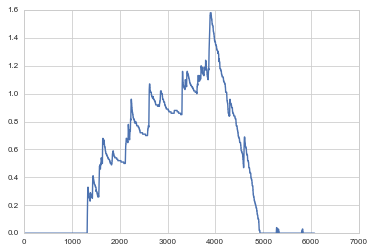

In [16]:
# plt.plot(out.scalarSWE) -- this doesn't exist right now
plt.plot(CDP.snowDepth)

In [11]:
CDP

<xarray.Dataset>
Dimensions:     (time: 103995)
Coordinates:
  * time        (time) datetime64[ns] 1993-11-10 1993-11-10T01:00:00 ...
Data variables:
    Tair        (time) float64 0.66 0.11 0.13 -0.52 -0.38 -0.61 -0.67 -0.71 ...
    QS          (time) float64 0.004486 0.004266 0.004317 0.004117 0.004159 ...
    WIND        (time) float64 0.1 0.5 0.4 0.2 0.1 0.1 0.4 0.8 0.3 0.7 1.0 ...
    precipRain  (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    precipSnow  (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    LWdwn       (time) float64 295.8 259.4 265.6 253.6 245.8 225.6 228.9 ...
    SWdwnDir    (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 18.53 ...
    SWdwnDif    (time) float64 0.278 0.0 0.0 0.278 0.0 0.0 0.0 1.944 20.56 ...
    Press       (time) float64 8.726e+04 8.721e+04 8.719e+04 8.719e+04 ...
    SWdwn       (time) float64 0.278 0.0 0.0 0.278 0.0 0.0 0.0 1.944 20.56 ...
    precip      (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0

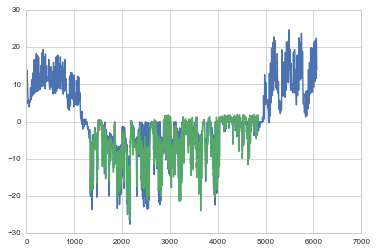

In [21]:
plt.plot(out.scalarSurfaceTemp - 273.15)
plt.plot(CDP.Tsrf)

(-30, 0)

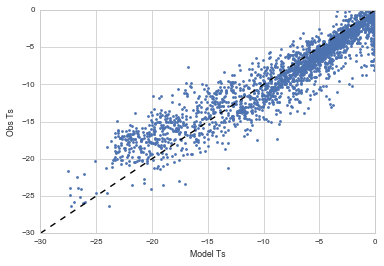

In [24]:
plt.plot(out.scalarSurfaceTemp - 273.15, CDP.Tsrf, '.')
plt.plot([-30, 0], [-30, 0], 'k--')
ax = plt.gca()
ax.set_xlabel('Model Ts')
ax.set_ylabel('Obs Ts')
ax.set_xlim(-30, 0)
ax.set_ylim(-30, 0)

## Check out the layer runs

In [26]:
os.chdir('/Users/karllapo/gdrive/SnowHydrology/proj/ModTsfc/summa/ModTsfc_summa/output/layers/CDP/')

layerThin = xr.open_dataset('layerThick_2005-2006_thinLayer_1.nc')
layerThick = xr.open_dataset('layerThin_2005-2006_thickLayer_1.nc')
jrdn1991 = xr.open_dataset('jrdn1991_2005-2006_jrdn1991_1.nc')
clm2010 = xr.open_dataset('CLM_2010_2005-2006_CLM_2010_1.nc')

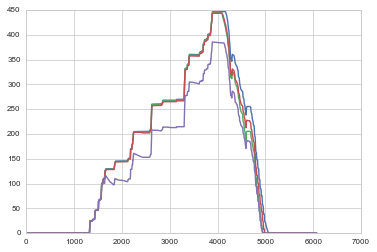

In [28]:
plt.plot(layerThin.scalarSWE)
plt.plot(layerThick.scalarSWE)
plt.plot(clm2010.scalarSWE)
plt.plot(jrdn1991.scalarSWE)

(-30, 0)

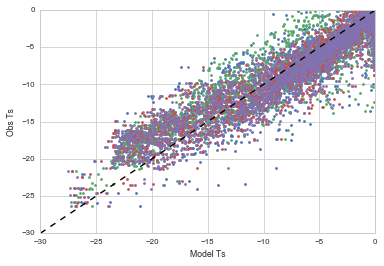

In [29]:
plt.plot(layerThin.scalarSurfaceTemp - 273.15, CDP.Tsrf, '.')
plt.plot(layerThick.scalarSurfaceTemp - 273.15, CDP.Tsrf, '.')
plt.plot(clm2010.scalarSurfaceTemp - 273.15, CDP.Tsrf, '.')
plt.plot(jrdn1991.scalarSurfaceTemp - 273.15, CDP.Tsrf, '.')

plt.plot([-30, 0], [-30, 0], 'k--')
ax = plt.gca()
ax.set_xlabel('Model Ts')
ax.set_ylabel('Obs Ts')
ax.set_xlim(-30, 0)
ax.set_ylim(-30, 0)

ValueError: could not convert string to float: 'hru'

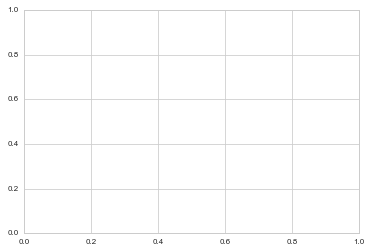

In [31]:
plt.plot(jrdn1991.groupby('time.hour').mean(dim='time'))